In [1]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression, Lars, ElasticNet, Lasso, Ridge, BayesianRidge
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
import cufflinks as cf
import pandas as pd
import numpy as np
import emoji
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
import matplotlib.pyplot as plt
import matplotlib
import emoji
import re
import re, unicodedata
from pandas import DataFrame
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from pickle import dump, load

In [2]:
data= pd.read_csv('/Users/arianasalas/Downloads/Modulo 5/Untitled Folder/Notebook/betsentiment-ES-tweets-sentiment-teams.csv', encoding='latin1')

In [3]:
data.drop(['tweet_date_created','language', 'tweet_id', 'sentiment_score'], axis=1, inplace=True)

In [4]:
import sys
sys.path.append("../")
from hello_world.tweet_evaluator import Process

In [5]:
pr = Process(data, "../hello_world/")
pr.run()

Starting process
Process previous clean text
Evaluating negative words


In [7]:
features = [
    'tweet_mensaje',
    'n_emojis', 'n_lower', 'n_upper',
    'n_digit', 'n_whitespaces', 'n_words', 'has_tags', 'has_hashtag',
    'has_urls', 'n_exclamation', 'n_question', 'n_hashtag', 'n_tags',
    'n_urls', 'count_personal_positive',
    'count_personal_negative'
]

In [ ]:
# vect = CountVectorizer(stop_words=stopwords.words("spanish"), ngram_range=(1, 1), min_df=1, max_features=100)

In [ ]:
# vect.fit(data["tweet_clean"])

In [36]:
X=pr.data[features]
y=pr.data["sentiment"]

In [37]:
mm_x = MinMaxScaler()
Xs = mm_x.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y)

In [11]:
logreg = LogisticRegression(max_iter=1000, multi_class="multinomial")

In [12]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [13]:
logreg.score(X_test, y_test)

0.8446514151369925

In [14]:
ls_scores = cross_val_score(logreg, X_train, y_train, cv=4, n_jobs=-1)
np.mean(ls_scores), np.std(ls_scores)

(0.8460263371861722, 0.001526955533976838)

In [15]:
logreg.predict(X_test)

array(['NEUTRAL', 'NEUTRAL', 'NEUTRAL', ..., 'NEUTRAL', 'NEUTRAL',
       'NEUTRAL'], dtype=object)

In [16]:
pd.DataFrame(logreg.predict_proba(X_test))

,0,1,2,3
0,0.000311,0.014559,0.898496,0.086634
1,0.001558,0.065245,0.855902,0.077295
2,0.000356,0.014603,0.899393,0.085648
3,0.001154,0.041625,0.896033,0.061188
4,0.001562,0.041768,0.876604,0.080066
...,...,...,...,...
33172,0.000199,0.008003,0.974793,0.017005
33173,0.002766,0.073824,0.833092,0.090318
33174,0.003120,0.063169,0.854166,0.079545
33175,0.003963,0.192437,0.749204,0.054396


In [17]:
logreg.classes_

array(['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE'], dtype=object)

In [19]:
loaded_model = load(open("../hello_world/data/models/los_merequetengues.pk", 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8445308496850228


In [20]:
def get_trained_model(data):
    model = load(open("../hello_world/data/models/los_merequetengues.pk", 'rb'))
    predict = model.predict(data)
    proba = model.predict_proba(data)
    clases = model.classes_
    return predict, proba, clases

In [26]:
sample

array([[0.1654321 , 0.        , 0.16508539, ..., 0.16666667, 0.        ,
        0.        ],
       [0.08148148, 0.        , 0.08918406, ..., 0.        , 0.        ,
        0.        ],
       [0.18024691, 0.        , 0.19165085, ..., 0.16666667, 0.        ,
        0.        ],
       ...,
       [0.18024691, 0.        , 0.20683112, ..., 0.        , 0.        ,
        0.        ],
       [0.10493827, 0.        , 0.11954459, ..., 0.        , 0.        ,
        0.16666667],
       [0.2037037 , 0.        , 0.21252372, ..., 0.16666667, 0.42857143,
        0.        ]])

In [25]:
sample = X_test

In [22]:
loaded_model.predict(X_test)

array(['NEUTRAL', 'NEUTRAL', 'NEUTRAL', ..., 'NEUTRAL', 'NEUTRAL',
       'NEUTRAL'], dtype=object)

In [27]:
predict, proba, cl = get_trained_model(sample)

In [28]:
predict

array(['NEUTRAL', 'NEUTRAL', 'NEUTRAL', ..., 'NEUTRAL', 'NEUTRAL',
       'NEUTRAL'], dtype=object)

In [29]:
proba[0][0]

0.00029305409609954125

In [30]:
cl

array(['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE'], dtype=object)

# Clusters

In [35]:
Xs

array([[0.18641975, 0.        , 0.21631879, ..., 0.        , 0.14285714,
        0.33333333],
       [0.09753086, 0.        , 0.10436433, ..., 0.        , 0.        ,
        0.        ],
       [0.1617284 , 0.        , 0.17267552, ..., 0.33333333, 0.        ,
        0.        ],
       ...,
       [0.11481481, 0.        , 0.11005693, ..., 0.        , 0.        ,
        0.        ],
       [0.08148148, 0.        , 0.08728653, ..., 0.        , 0.14285714,
        0.        ],
       [0.13703704, 0.        , 0.14231499, ..., 0.16666667, 0.14285714,
        0.        ]])

In [32]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [39]:
sse,db,slc = {}, {}, {}
for k in range(2, 10):
    print(k)
    mini_Xp = X.sample(frac=0.1)
    kmeans = KMeans(n_clusters=k, random_state=10).fit(mini_Xp)
    if k == 3: 
        labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
    db[k] = davies_bouldin_score(mini_Xp,clusters)
    slc[k] = silhouette_score(mini_Xp,clusters)

2
3
4
5
6
7
8
9


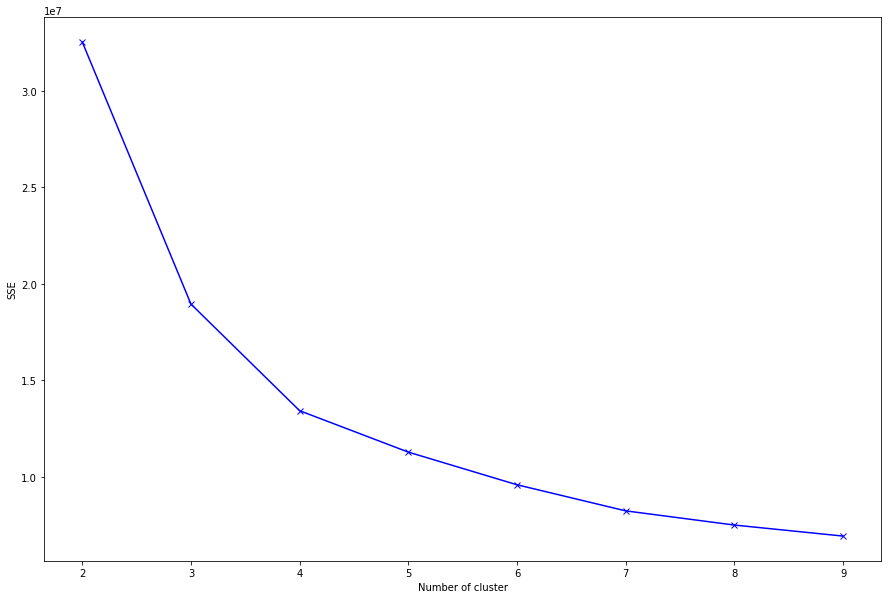

In [40]:
plt.figure(figsize=(15,10))
plt.plot(list(sse.keys()), list(sse.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

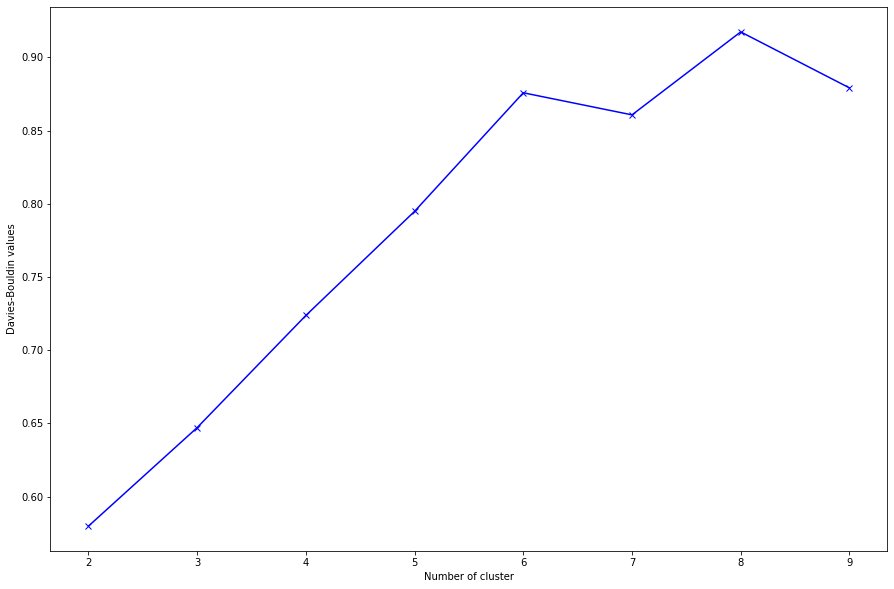

In [41]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

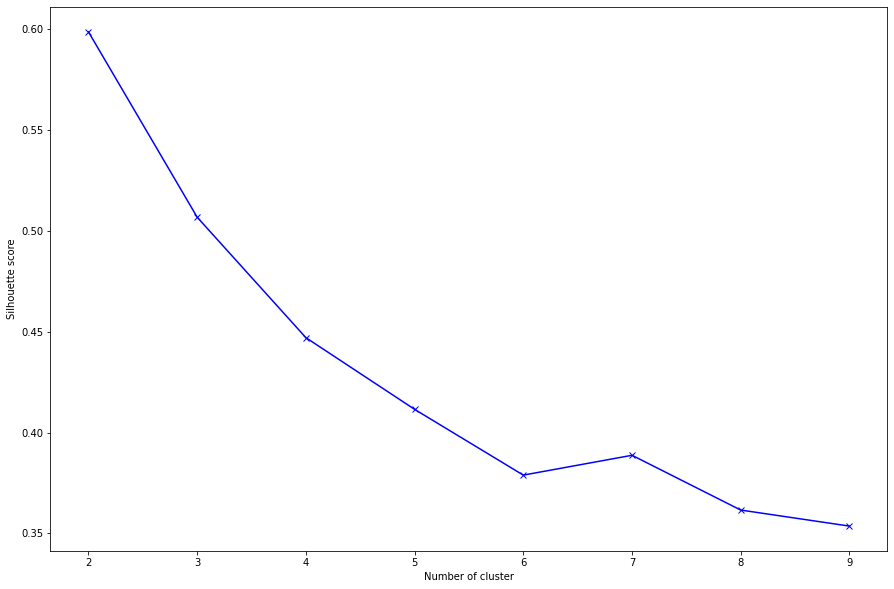

In [42]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

In [43]:
km = KMeans(n_clusters=4, n_jobs=-1, random_state=10)

In [45]:
km.fit(Xs)

/Users/arianasalas/Documents/Ariana/last_pr/venv/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



KMeans(n_clusters=4, n_jobs=-1, random_state=10)

In [46]:
km.predict(Xs)

array([1, 1, 2, ..., 1, 2, 3], dtype=int32)

In [47]:
from sklearn.mixture import GaussianMixture

In [48]:
gmm = GaussianMixture(n_components=4)

In [49]:
gmm.fit(Xs)

GaussianMixture(n_components=4)

In [53]:
X['cluster']=gmm.predict(Xs)

In [54]:
X.groupby("cluster").mean().style.background_gradient(cmap='Blues')

,tweet_mensaje,n_emojis,n_lower,n_upper,n_digit,n_whitespaces,n_words,has_tags,has_hashtag,has_urls,n_exclamation,n_question,n_hashtag,n_tags,n_urls,count_personal_positive,count_personal_negative
cluster,,,,,,,,,,,,,,,,,
0,158.735067,0.000639,100.201186,18.828428,3.157928,22.904632,22.299886,0.712161,0.608350,0.525941,1.000000,1.000000,1.571024,1.970888,0.625690,0.479352,0.336482
1,141.205434,0.000099,97.775692,12.091713,1.940145,21.076602,21.470171,0.999586,0.198341,0.000000,0.000000,0.000000,0.390772,3.616144,0.000000,0.462093,0.497774
2,170.405976,0.001239,111.855815,17.306864,3.766703,24.516061,24.104304,0.000000,1.000000,0.620365,0.000000,0.000000,3.941949,0.000000,0.733164,0.433527,0.334592
3,179.500057,0.000421,115.904190,19.168586,4.521217,24.597207,23.910427,1.000000,0.637268,1.000000,0.000000,0.000000,1.884370,2.313488,1.158102,0.372221,0.243849


In [56]:
dump(gmm, open('los_merequetenguesC.pk','wb'))

In [60]:
cluster_model=load(open('../hello_world/data/models/los_merequetenguesC.pk','rb'))

In [61]:
cluster_model.predict(Xs)

array([1, 1, 2, ..., 1, 2, 3])